# Autómata de Pila

Ejemplifica la creación de un autómata de pila

In [1]:
from maquinas.contextfree.pda import PushDownAutomaton as PDA
from maquinas.simulation import Simulation

In [2]:
# Creating automata finito
aⁿbⁿ=PDA(Q=['q_0','q_1','q_2'],
         sigma=['a','b'],
         gamma=['A'],
         q_0='q_0',
         A=['q_2'],
         delta=[
            (('q_0','a','Z0'),[('q_0','AZ0')]),
            (('q_0','a','A'),[('q_0','AA')]),
            (('q_0','b','A'),[('q_1','epsilon')]),
            (('q_1','b','A'),[('q_1','epsilon')]),
            (('q_1','epsilon','Z0'),[('q_2','Z0')]),
         ]
    )

In [3]:
print(aⁿbⁿ.summary())

States  : q_0, q_1, q_2
Sigma   : ε, a, b
Gamma   : ε, Z₀, A, a, b
Initial : q_0
Aceptors: q_2
Transitions:
 q_0,a,Z₀/AZ₀ → q_0
 q_0,a,A/AA → q_0
 q_0,b,A/ε → q_1
 q_1,b,A/ε → q_1
 q_1,ε,Z₀/Z₀ → q_2


In [4]:
for q,a,w_ in aⁿbⁿ.delta_stepwise("aaabbb"):
    if a:
        print(f"{a} -> {aⁿbⁿ.states2string(q)}", end=",\n ")
    else:
        print(f"{aⁿbⁿ.states2string(q)}",end="\n ")
    res=q
    
print(f"\nCon {aⁿbⁿ.states2string(res)} Se acepta?", "Sí" if aⁿbⁿ.acceptor(res) else "No" )

q_0, Z₀]
 a -> q_0, A Z₀],
 a -> q_0, A A Z₀],
 a -> q_0, A A A Z₀],
 b -> q_1, A A Z₀],
 b -> q_1, A Z₀],
 b -> q_1, Z₀] | q_2, Z₀],
 
Con q_1, Z₀] | q_2, Z₀] Se acepta? Sí


In [5]:
res=aⁿbⁿ.delta_extended(None,"aab")
print(f"Con {aⁿbⁿ.states2string(res)} Se acepta?", "Sí" if aⁿbⁿ.acceptor(res) else "No" )

Con q_1, A Z₀] Se acepta? No


In [6]:
res=aⁿbⁿ.delta_extended(None,"aabb")
print(f"Con {aⁿbⁿ.states2string(res)} Se acepta?", "Sí" if aⁿbⁿ.acceptor(res) else "No" )

Con q_1, Z₀] | q_2, Z₀] Se acepta? Sí


In [7]:
s=Simulation(aⁿbⁿ,"aaabbb")
s.run()

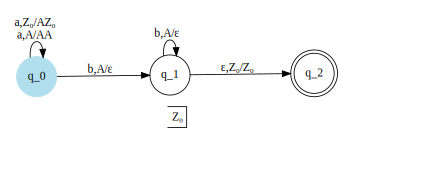

In [8]:
aⁿbⁿ.graph()

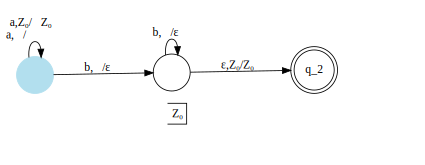

In [9]:
aⁿbⁿ.graph(symbols={'A':'🌵'},states={'q_0':'🤣','q_1':'🤗'})

In [10]:
aⁿbⁿ.table()

,a,b,ε
⟶q_0,Z₀/AZ₀→q_0A/AA→q_0,A/ε→q_1,∅
q_1,∅,A/ε→q_1,Z₀/Z₀→q_2
q_2,∅,∅,∅


In [11]:
aⁿbⁿ.save_gif('aaabbb')